# ABALONE CASE STUDY

## Importing Libreries


In [1]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing all required libraries

## Importing dataset


In [2]:
#Import the dataset

df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Importing the dataset

## Shape of data with number of rows and columns


In [3]:
df.shape

(4177, 9)

There are 4177 rows and 9 columns in dataset

## Detailed description


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values, 25th, 50th(median) and 75th percentile.

## Datatypes of all columns


In [5]:
#check the data types of all the columns
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

We have object(string) datatype in sex column which are catogorical values, integer data type in rings column and rest are the floating values. All are independent variable except Rings. Rings is a target variable.

## Checking is there any null value in dataset


In [6]:
#check is there any null value present in any column

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We can see no null values present in the dataset. There are no missing values in whole dataset, so we can proceed safely.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


We can see the complete information about data frame.

In [8]:
df["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [9]:
df.loc[df['Rings']== " "]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


As we can see there are no missing values or any spaces are available in target variable.

### As mentioned in the problem statement, need to add +1.5 on each value of target variable convert it into regression problem:

In [10]:
#adding 1.5 to each value of rings column
Rings = [] #empty list

for i in df["Rings"]:
    a=i+1.5
    Rings.append(a)
    
Rings

[16.5,
 8.5,
 10.5,
 11.5,
 8.5,
 9.5,
 21.5,
 17.5,
 10.5,
 20.5,
 15.5,
 11.5,
 12.5,
 11.5,
 11.5,
 13.5,
 8.5,
 11.5,
 8.5,
 10.5,
 12.5,
 11.5,
 13.5,
 10.5,
 11.5,
 12.5,
 12.5,
 13.5,
 16.5,
 12.5,
 11.5,
 16.5,
 19.5,
 20.5,
 14.5,
 9.5,
 17.5,
 9.5,
 12.5,
 10.5,
 10.5,
 15.5,
 6.5,
 6.5,
 5.5,
 8.5,
 10.5,
 8.5,
 7.5,
 10.5,
 9.5,
 8.5,
 11.5,
 11.5,
 8.5,
 9.5,
 9.5,
 9.5,
 5.5,
 8.5,
 8.5,
 10.5,
 11.5,
 8.5,
 9.5,
 9.5,
 13.5,
 14.5,
 11.5,
 7.5,
 14.5,
 9.5,
 21.5,
 12.5,
 14.5,
 16.5,
 10.5,
 11.5,
 12.5,
 15.5,
 10.5,
 13.5,
 17.5,
 22.5,
 15.5,
 13.5,
 14.5,
 11.5,
 10.5,
 13.5,
 16.5,
 13.5,
 14.5,
 11.5,
 16.5,
 15.5,
 10.5,
 9.5,
 8.5,
 11.5,
 8.5,
 16.5,
 16.5,
 11.5,
 13.5,
 13.5,
 12.5,
 11.5,
 10.5,
 10.5,
 10.5,
 10.5,
 10.5,
 10.5,
 12.5,
 12.5,
 12.5,
 11.5,
 10.5,
 9.5,
 10.5,
 8.5,
 15.5,
 7.5,
 7.5,
 6.5,
 7.5,
 9.5,
 20.5,
 19.5,
 18.5,
 10.5,
 8.5,
 8.5,
 8.5,
 9.5,
 8.5,
 10.5,
 10.5,
 10.5,
 11.5,
 11.5,
 17.5,
 12.5,
 11.5,
 11.5,
 11.5,
 10.5,
 6.5,


In [11]:
#after adding 1.5 in target variable.
df["Rings"]= Rings
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


## EDA (Exploratory Data Analysis)


### Visualization (Uni Variate analysis)


Uni variate analysis works with only one variable, hence it is called uni variate.

<AxesSubplot:xlabel='Length', ylabel='Density'>

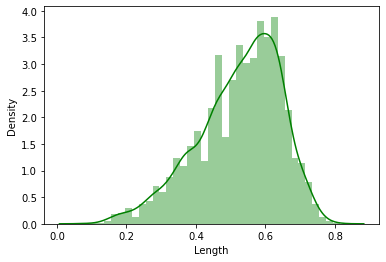

In [12]:
sns.distplot(df["Length"], color = 'g')     

As we can see length is almost normally distributed.

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

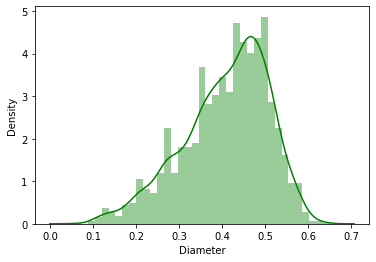

In [13]:
sns.distplot(df["Diameter"], color = 'g')

Small amount of skewness present in Diameter.

<AxesSubplot:xlabel='Height', ylabel='Density'>

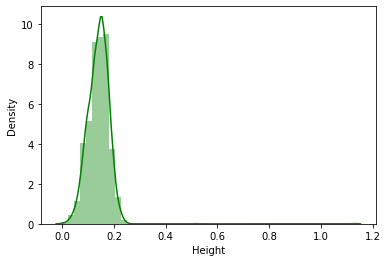

In [14]:
sns.distplot(df["Height"], color = 'g')

Height contains soo much skewness.

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

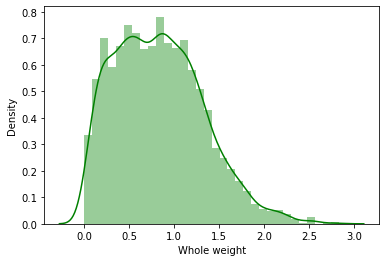

In [15]:
sns.distplot(df["Whole weight"], color = 'g')

Whole Weight variable is also skewed.

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

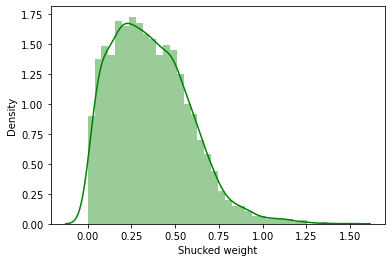

In [16]:
sns.distplot(df["Shucked weight"], color = 'g')

shucked weight also contains skewness.

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

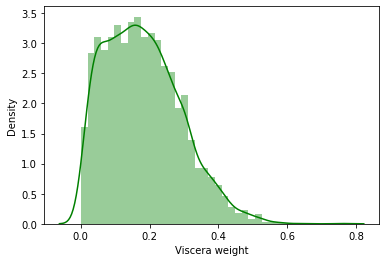

In [17]:
sns.distplot(df["Viscera weight"], color = 'g')

Viscera weight has the skewness.

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

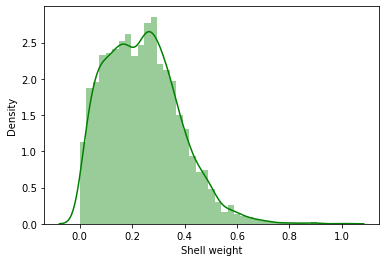

In [18]:
sns.distplot(df["Shell weight"], color = 'g')

Shell weight is also have the skewness.

<AxesSubplot:xlabel='Rings', ylabel='Density'>

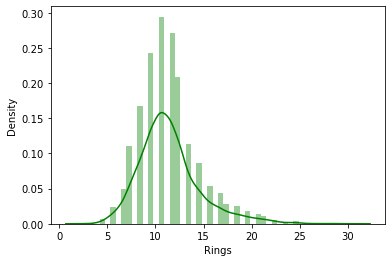

In [19]:
sns.distplot(df["Rings"], color = 'g')

It is a target variable.

## Analysis through boxplot


In [20]:
features = df[["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]]


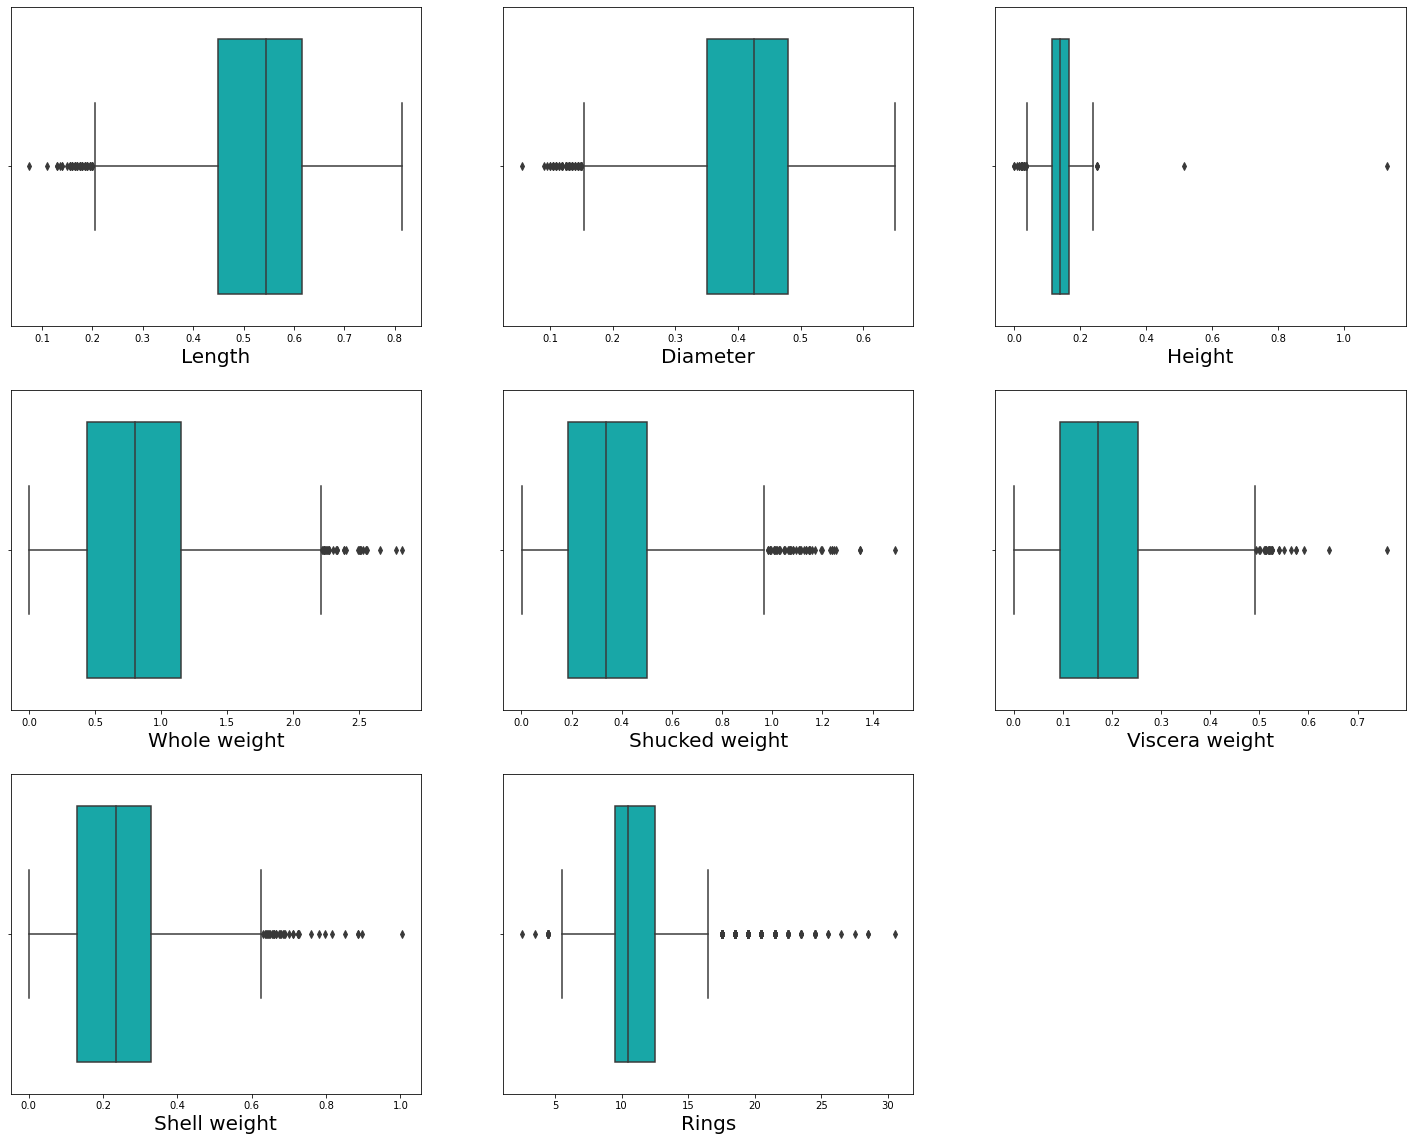

In [21]:
#Relationship Visualizing

plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in features:
    if plotnumber <= 9: # as we see there are eight columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(features[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

Every column contains outliers("Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight")

## Bi variate analysis

Bi variate analysis is works with two variables.

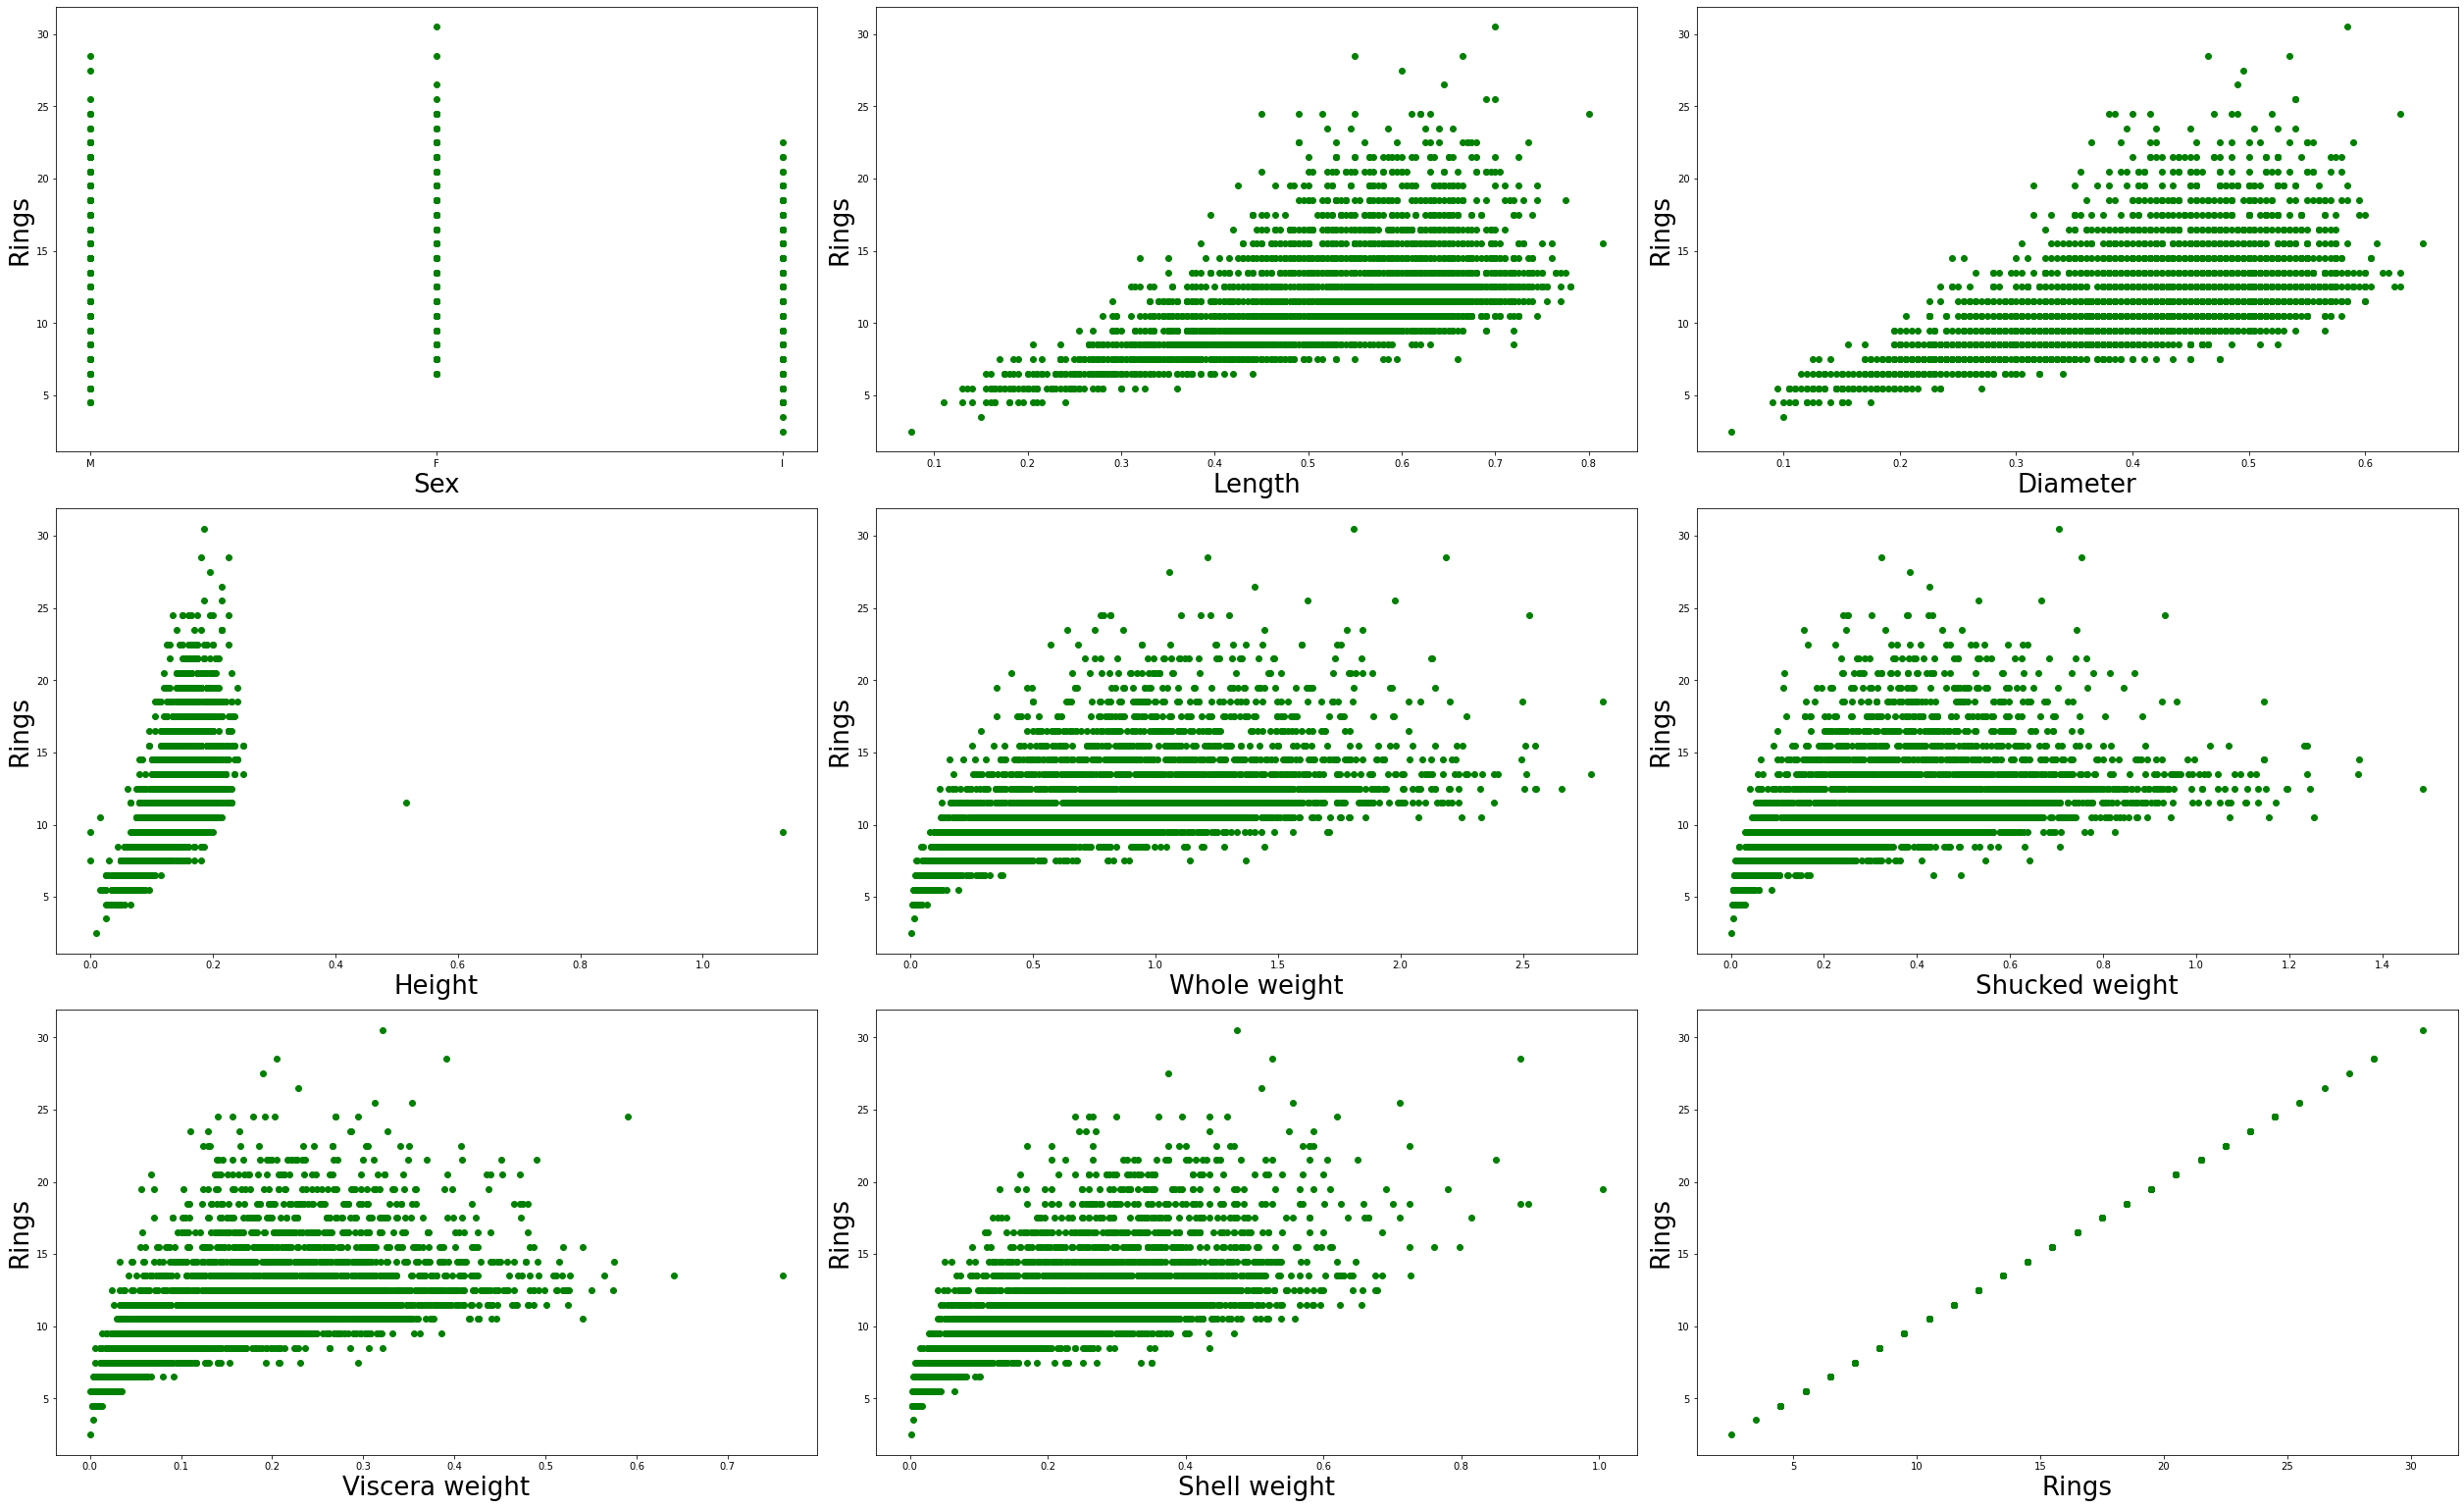

In [22]:
#Relationship Visualizing

plt.figure(figsize = (35,35), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],df['Rings'], color='g')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('Rings', fontsize=26)
    plotnumber += 1
plt.tight_layout()


There are some variables are having some amount of linear relationship with target variable and some are having non linear relationship with target variable.

As we can see in the plot some outliers are also present in it.

## Multi Variate analysis

Multi variate analysis find the relationship with all variables. Now we will visualize the data and check the coiefficient of multicollinearity

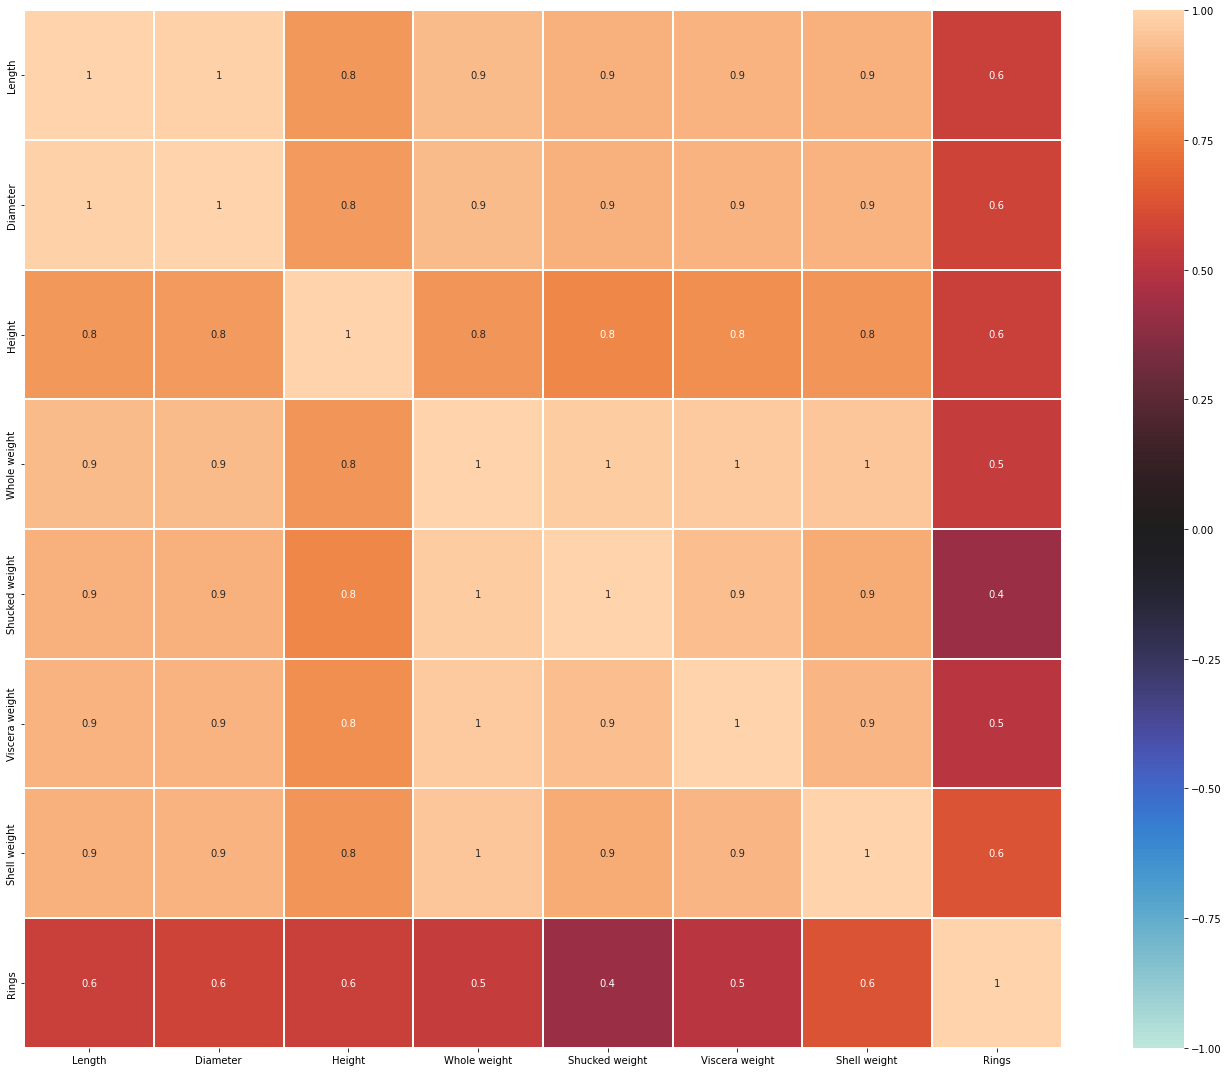

In [23]:
df_cor = df.corr().abs()

plt.figure(figsize = (20,15))
sns.heatmap(df_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in plot 'Shucked weight' and 'Rings' correlation value is in less amount(40%). 'Shell weight' and 'Whole weight' are strongly correlated with 100%. 'Viscera weight' and 'Whole weight' are strongly correlated with 100%. 'Shucked weight' and 'Whole weight' are strongly correlated with 100%.

### Find out which columns are positively and negatively correlated with each other

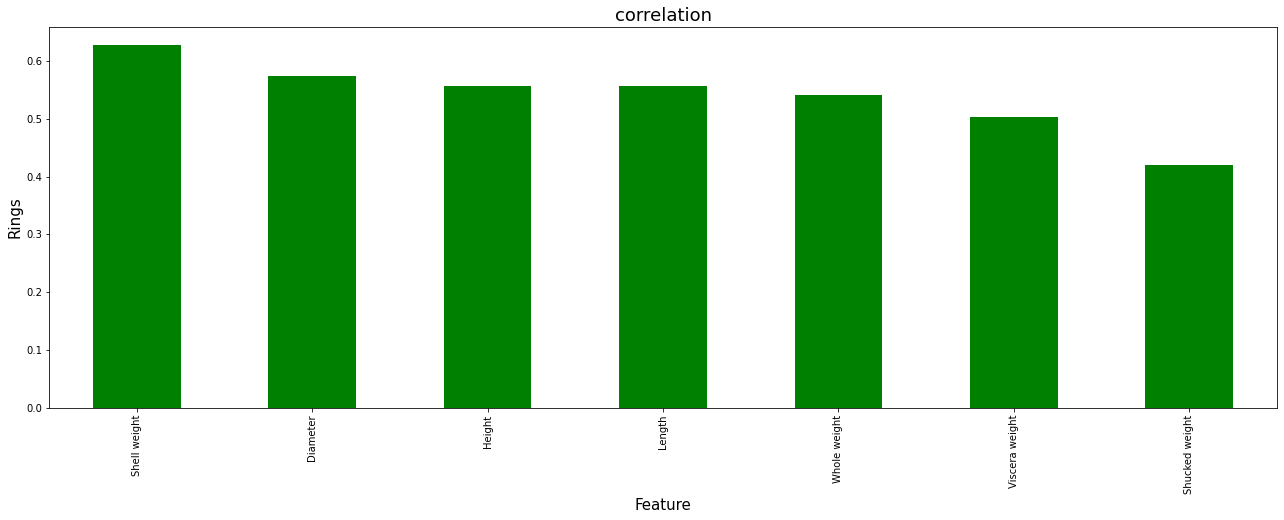

In [24]:
plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending = False).drop(['Rings']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Rings', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

As shown in plot all features are positively correlate with target variable. There are no negative correlation in it.

### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:


## Encoding

### Encode input variable 'sex'


In [25]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

There are 3 unique values present in sex column.

In [26]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Number of count of each unique value.

In [27]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [28]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [29]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [30]:
df['Sex'].unique()

array([2, 0, 1])

## Remove outliers

Now we have found the outliers and skewness in some variables.So, first removing the outliers.

### 1.Outlier removal using Zscore

In [31]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight', 'Shell weight']])
abs_zscore = np.abs(z_score)

new_data = (abs_zscore < 3).all(axis = 1)

new_df = df[new_data]

print("shape before :", df.shape)
print("shape after :", new_df.shape)
print("Percentage Loss :", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before : (4177, 9)
shape after : (4084, 9)
Percentage Loss : 0.022264783337323436


In [32]:
new_df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,1.050196,0.522090,0.406308,0.138530,0.808404,0.350172,0.176579,0.233142,11.401567
std,0.820493,0.115709,0.095848,0.037001,0.457321,0.205827,0.103336,0.129482,3.164617
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,4.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441000,0.185375,0.092875,0.130000,9.500000
50%,1.000000,0.540000,0.420000,0.140000,0.790750,0.332000,0.168500,0.230000,10.500000
75%,2.000000,0.610000,0.480000,0.165000,1.134750,0.494000,0.247000,0.320500,12.500000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,30.500000


97.773% data remains after using Zscore outlier technique.

### 2. Outlier Removing using IQR


### from boxplot in EDA, we came to know that outliers present in following columns.

#### Visualize data again to check outliers are present at lower side or higher side

In [33]:
df2 = df

In [34]:
#features in which outliers are detected
features = df2[["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]]

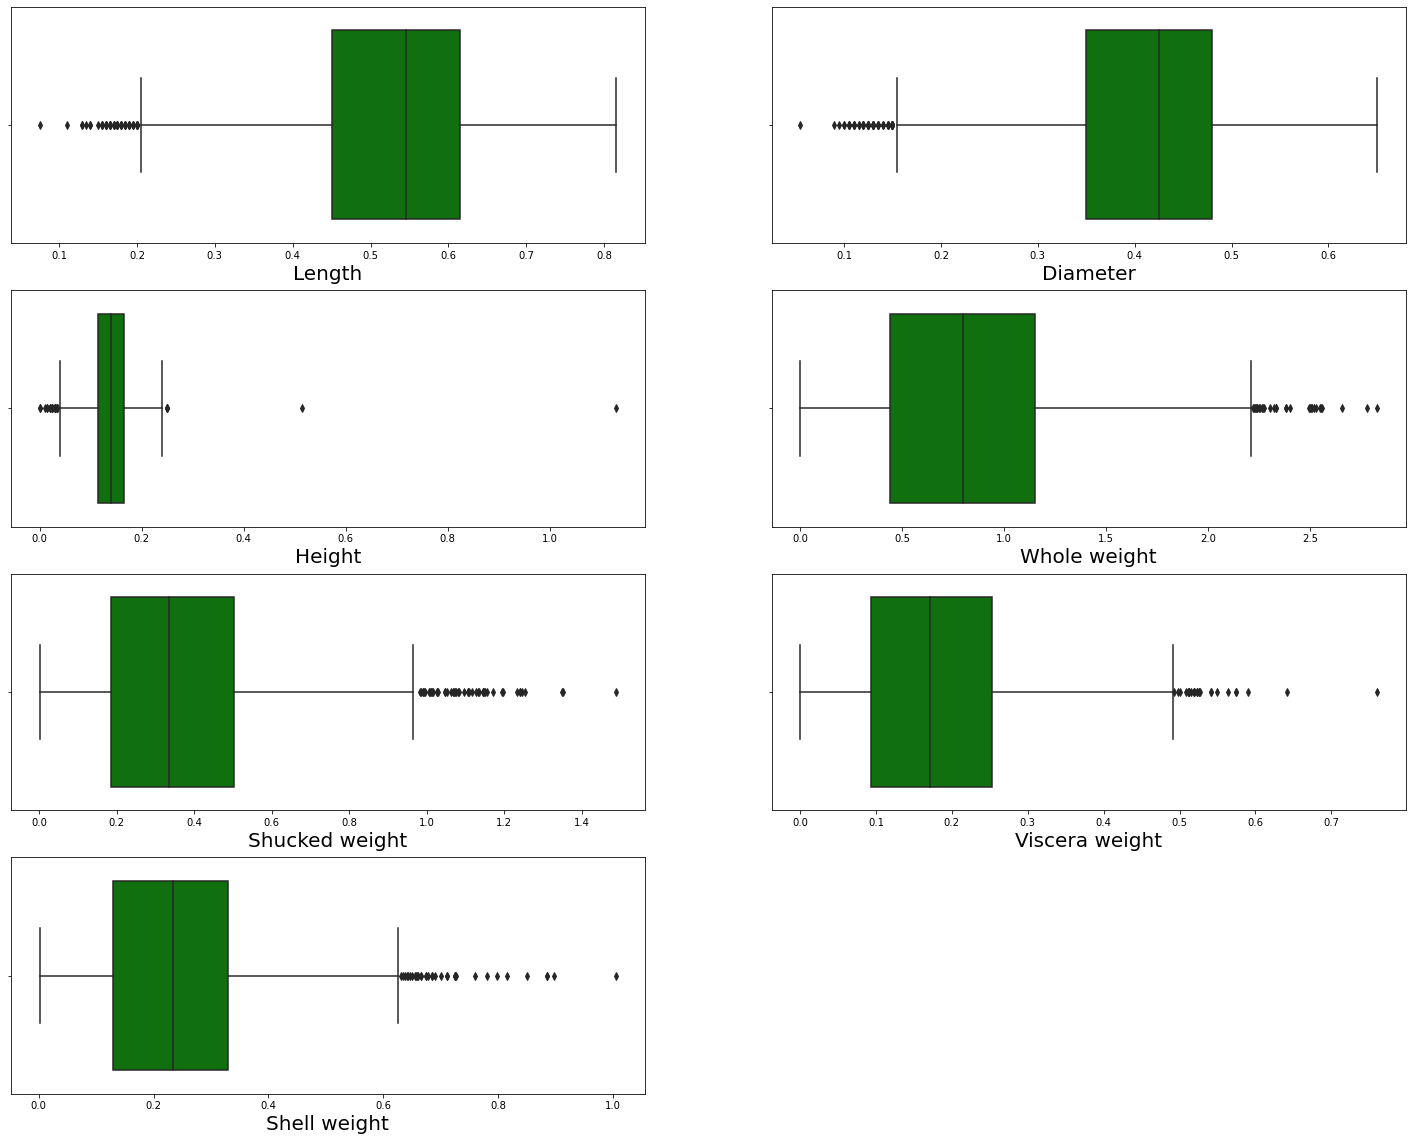

In [35]:
plt.figure(figsize=(25,20))
graph = 1

for column in features:
    if graph <= 30:
        ax = plt.subplot(4,2, graph)
        sns.boxplot(features[column], color = 'g')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

In [36]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = df2.quantile(0.25)

#3rd quantile 75%
q3 = df2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [37]:
df2.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


## Outlier detection formula

### Higher side ==> Q3 + (1.5 * IQR)

### Lower side ==> Q1 - (1.5 * IQR)

#### Outliers removal from higher side

In [38]:
#Check the Outliers for Length
#Remove outliers from lower side so, use lower side formula

Length_ = (q1.Length - (1.5*(iqr.Length)))
Length_

0.20250000000000004

In [39]:
index_out = np.where(df2['Length'] < Length_)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...,...
4123,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4124,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4125,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4126,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


after removing outliers the 4128 rows will remains in dataframe.

In [40]:
# Diameter is having outliers in lower side so use lower side formula
#Check the Outliers for Diameter
#Remove outliers from lower side so, use lower side formula

Diameter_ = (q1.Diameter - (1.5*(iqr.Diameter)))
Diameter_

0.15499999999999997

In [41]:
index_out = np.where(df['Diameter'] < Diameter_)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...,...
4064,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4065,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4066,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4067,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


after removing outliers the 4069 rows will remains in dataframe.

In [42]:
# Height is having outliers in lower side so use lower side formula
#Check the Outliers for Height
#Remove outliers from lower side so, use lower side formula

Height_ = (q1.Height - (1.5*(iqr.Height)))
Height_

0.039999999999999994

In [43]:
index_out = np.where(df2['Height'] < Height_)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...,...
4060,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4061,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4062,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4063,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [44]:
#as shown in boxplot we have outlier in higher side of height also
#Remove outliers from higher side so, use higher side formula

Height_high = (q3.Height + (1.5*(iqr.Height)))
Height_high

0.24000000000000002

In [45]:
index_out = np.where(df2['Height'] > Height_high)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...,...
4055,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4056,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4057,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4058,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


after removing outliers the 4060 rows will remains in dataframe.

In [46]:
#as shown in boxplot we have outlier in higher side of whole weightafter removing outliers the 4069 rows will remains in dataframe. 
#Remove outliers from higher side so, use higher side formula

Wholeweight_ = (1.153000 + (1.5*(1.153000-0.441500)))
Wholeweight_

2.22025

In [47]:
index_out = np.where(df['Whole weight'] > Wholeweight_)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...,...
4025,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4026,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4027,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4028,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


after removing outliers in Whole weight the 4030 rows will remains in dataframe.

In [48]:
#as shown in boxplot we have outlier in higher side of Shucked weight 
#Remove outliers from higher side so, use higher side formula

Shuckedweight_ = (0.253000 + (1.5*(0.253000-0.186000)))
Shuckedweight_

0.35350000000000004

In [49]:
df2['Shucked weight']

0       0.2245
1       0.0995
2       0.2565
3       0.2155
4       0.0895
         ...  
4172    0.3700
4173    0.4390
4174    0.5255
4175    0.5310
4176    0.9455
Name: Shucked weight, Length: 4030, dtype: float64

In [50]:
index_out = np.where(df2['Shucked weight'] > Shuckedweight_)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...,...
2096,4165,1,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.0880,8.5
2097,4166,1,0.475,0.365,0.115,0.4990,0.2320,0.0885,0.1560,11.5
2098,4167,2,0.500,0.380,0.125,0.5770,0.2690,0.1265,0.1535,10.5
2099,4168,0,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,9.5


after removing outliers in Shucked weight the 2101 rows will remains in dataframe.

In [51]:
#as shown in boxplot we have outlier in higher side of Viscera weight 
#Remove outliers from higher side so, use higher side formula

Visceraweight_ = (0.502000 + (1.5*(0.502000-0.093500)))
Visceraweight_

1.11475

In [52]:
index_out = np.where(df['Viscera weight'] > Visceraweight_)
df2 = df2.drop(df2.index[index_out])
df2.shape
df2.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...,...
2096,4165,1,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.0880,8.5
2097,4166,1,0.475,0.365,0.115,0.4990,0.2320,0.0885,0.1560,11.5
2098,4167,2,0.500,0.380,0.125,0.5770,0.2690,0.1265,0.1535,10.5
2099,4168,0,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,9.5


after removing outliers in Viscera weight the 2101 rows will remains in dataframe.

### After removing outliers using IQR technique there are 2101 rows will remains in dataset.

Now, find how much data loss in IQR method

49.70 % data loss after using IQR technique.
50.30% data remains.

### After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique

## Check the skewness and remove it

In [53]:
new_df.skew()

Sex              -0.092911
Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
Rings             1.136367
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

Length, Diameter.

### Check outliers datatype. 


#### If data types of skewed column is integer (catogorical) than no need to remove skewness from that variable.

In [54]:
new_df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings             float64
dtype: object

## Apply Power transformation to remove skewness

In power transformation we will take the mean value in place of 0th value skewed data and convert that into normal data(distribution)/less skewed data.

In [55]:
#applying Power transformation on skewed columns

new_df['Length'] = new_df['Length'].replace(0,new_df['Length'].mean())
new_df['Diameter'] = new_df['Diameter'].replace(0,new_df['Diameter'].mean())

<AxesSubplot:xlabel='Length', ylabel='Density'>

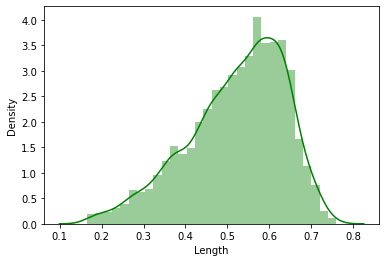

In [56]:
sns.distplot(new_df["Length"], color = 'g')

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

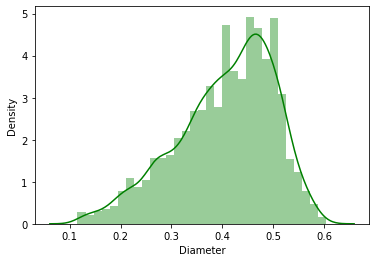

In [57]:
sns.distplot(new_df["Diameter"], color = 'g')

As shown in plot skewness removes after using power transformation skewness removal technique.

## Seperating the columns into featuers and target:

### X= features, y=Target

In [58]:
x = new_df.drop(columns = 'Rings', axis=1)
y = new_df['Rings']

## Scalling technique

In [59]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [60]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif


,vif,Features
0,1.009022,Sex
1,38.611958,Length
2,40.190290,Diameter
3,6.511453,Height
4,104.751180,Whole weight
5,27.414592,Shucked weight
6,16.684535,Viscera weight
7,22.985530,Shell weight


as we have seen in the table vif value is greater than 5 for many columns, so drop maximum value column to avoid multicollinearity issue.

In [61]:
new_df=new_df.drop(['Whole weight'], axis=1)


In [62]:
x = new_df.drop(columns = 'Rings', axis=1)
y = new_df['Rings']

In [63]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [64]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.008920,Sex
1,38.610404,Length
2,40.182772,Diameter
3,6.505966,Height
4,9.103150,Shucked weight
5,10.630685,Viscera weight
6,9.654119,Shell weight


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Finding best random state

In [66]:
from sklearn.tree import DecisionTreeRegressor
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.1959936343549986 on Random_state  81


In [67]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 81)

## 1. Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [69]:
pred_test=Lr.predict(x_test)

In [70]:
print(r2_score(y_test,pred_test))

0.52871789981006


## Cross Validation of Linear Regression

In [71]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Lr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.37665239945152146

## Regularization

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [73]:
ls = Lasso(alpha = 0.01, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.5250721094904283

In [74]:
cv_score= cross_val_score(ls, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.352625399787191

The r2 score for linear regression model is : 52.50%

Cross validation score for linear regression is : 35.26%

## 2. Random Forest Regression

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [76]:
Rfr =RandomForestRegressor(criterion = "mse", max_features="log2")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

R2 Score:  52.991682297325916
Cross Val Score:  49.76234963918449


The r2 score for Random Forest Regressor model is : 52.99%
    
Cross validation score for Random Forest Regressor is : 49.76%

## 3. Decision Tree Regressor

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [78]:
pred_dtree = dtree.predict(x_test)
print(r2_score(y_test,pred_dtree))

0.13062541931075144


In [79]:
cv_score= cross_val_score(dtree, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.27076178976093057

The r2 score for Decision tree regression model is : 13.06%
    
Cross validation score for Decision tree regression is : 27.07%

## 4. Support Vector Regressor

In [80]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [81]:
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr))

0.5119728928677552


In [82]:
cv_score= cross_val_score(svr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4087381166116793

The r2 score for SVR model is : 51.19%
    
Cross validation score for SVR is : 40.87%

## Compare all models

The diffrence between r2 score and cross validation score of linear regression model is : 17.24%

The diffrence between r2 score and cross validation score Random Forest Regressor model is : 3.23%

The diffrence between r2 score and cross validation score of Decision Tree Regressor model is : 14.01%

The diffrence between r2 score and cross validation score of SVR model is : 10.32%

### So, best model is Random Forest Regressor.

## Hyper parameter tunning

In [83]:
#Random forest Classifier

Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8],
              'criterion' : ['mse', 'mae']}

In [84]:
GCV=GridSearchCV(RandomForestRegressor(),Parameters,cv=5)

In [85]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [86]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 700}

In [87]:
mod = RandomForestRegressor( criterion='mse', max_depth=7 , max_features='auto', n_estimators=700)

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(r2_score(y_test, pred)*100)

55.0441434429534


after hyper parameter tuning rendom forest regressor value is 55.04%

## Saving the model

In [88]:
#creating binary file first

with open("model_pickle", "wb") as f:
    pickle.dump(Rfrc, f)

In [89]:
#reading Bbinary file

with open("model_pickle","rb") as f:
    mp=pickle.load(f)

Model is saved.